<a href="https://colab.research.google.com/github/cassiecinzori/ECON3916/blob/main/labs/lecture7/estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Engine of Inference

### Cassandra Cinzori

## Module A: The Law of Large Numbers (FanDuel/DraftKings)

### Step 1: The Convergence Simulation

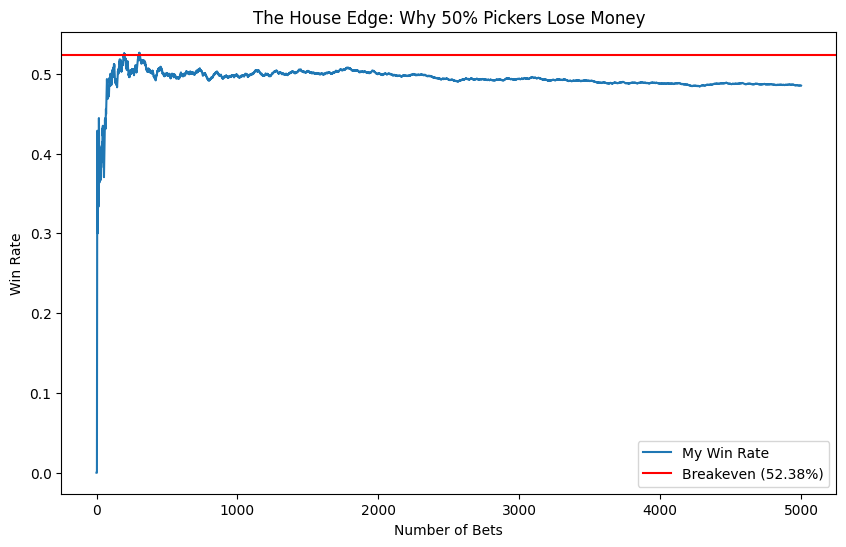

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup
true_skill = 0.50       # You win 50% of the time
breakeven = 0.5238      # -110 odds requires 52.38% to profit
n_bets = 5000           # Simulating a full season

# 2. Simulate
outcomes = np.random.binomial(1, true_skill, n_bets)
cumulative_win_rate = np.cumsum(outcomes) / np.arange(1, n_bets + 1)

# 3. Plot
plt.figure(figsize=(10,6))
plt.plot(cumulative_win_rate, label="My Win Rate")
plt.axhline(breakeven, color='red', label="Breakeven (52.38%)")
plt.legend()
plt.title("The House Edge: Why 50% Pickers Lose Money")
plt.xlabel("Number of Bets")
plt.ylabel("Win Rate")
plt.show()

### Step 2: Visualizing Sampling Error

Sampling Error Audit:
Sample 1: Mean = 34.31% | Error = -0.96%
Sample 2: Mean = 34.95% | Error = -0.32%
Sample 3: Mean = 35.77% | Error = +0.50%


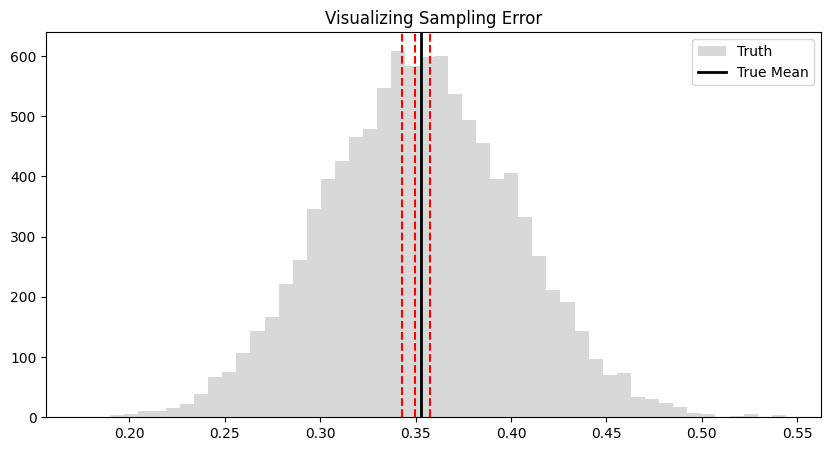

In [2]:
# 1. The "Unknown" Truth
true_mu = 0.3527  # Matching the "True Population Mean"

# 2. Simulate 3 distinct "Samples" (e.g., 3 different users)
samples = []
print(f"Sampling Error Audit:")

for i in range(3):
    # Draw 50 random bets
    sample = np.random.normal(true_mu, 0.05, 50)

    # Calculate stats
    x_bar = np.mean(sample)
    error = x_bar - true_mu   # The Formula: Error = x_bar - mu

    print(f"Sample {i+1}: Mean = {x_bar:.2%} | Error = {error:+.2%}")
    samples.append(x_bar)

# 3. Quick Visual Check
plt.figure(figsize=(10,5))
plt.hist(np.random.normal(true_mu, 0.05, 10000), bins=50, alpha=0.3, color='gray', label='Truth')
for mean in samples:
    plt.axvline(mean, color='red', linestyle='--') # Our Samples
plt.axvline(true_mu, color='black', linewidth=2, label='True Mean')
plt.title("Visualizing Sampling Error")
plt.legend()
plt.show()

## Module B: The Central Limit Theorem (Crypto Returns)

##### Objective: Proving the CLT works even in "Fat Tailed" environments like Crypto

### Step 1: Visualizing "The Chaos" (Population)

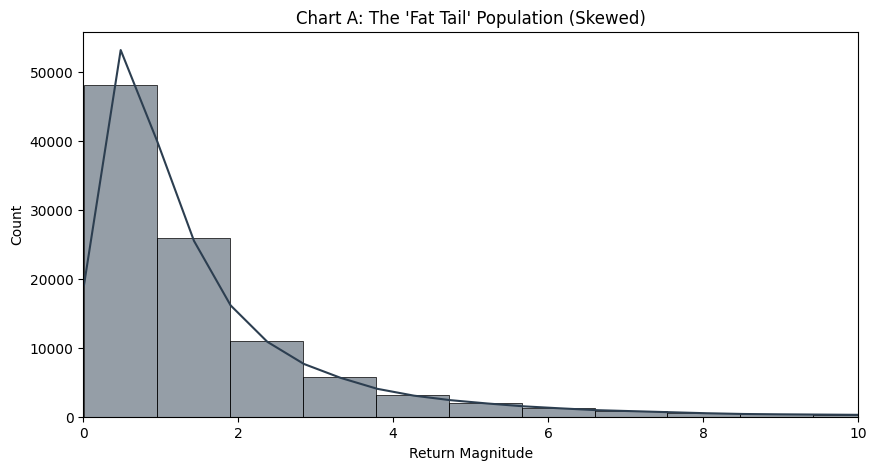

In [3]:
import seaborn as sns

# 1. Define the "Crypto Universe" (Population)
# Log-Normal matches the skewed "Hump + Long Tail" shape of markets
population_data = np.random.lognormal(mean=0, sigma=1.0, size=100000)

# 2. Visualize the Chaos
plt.figure(figsize=(10, 5))
sns.histplot(population_data, bins=100, kde=True, color='#2c3e50')
plt.xlim(0, 10)  # Crop to see the shape clearly
plt.title("Chart A: The 'Fat Tail' Population (Skewed)")
plt.xlabel("Return Magnitude")
plt.show()

### Step 2: The CLT Simulation ($n=1, 2, 30$)

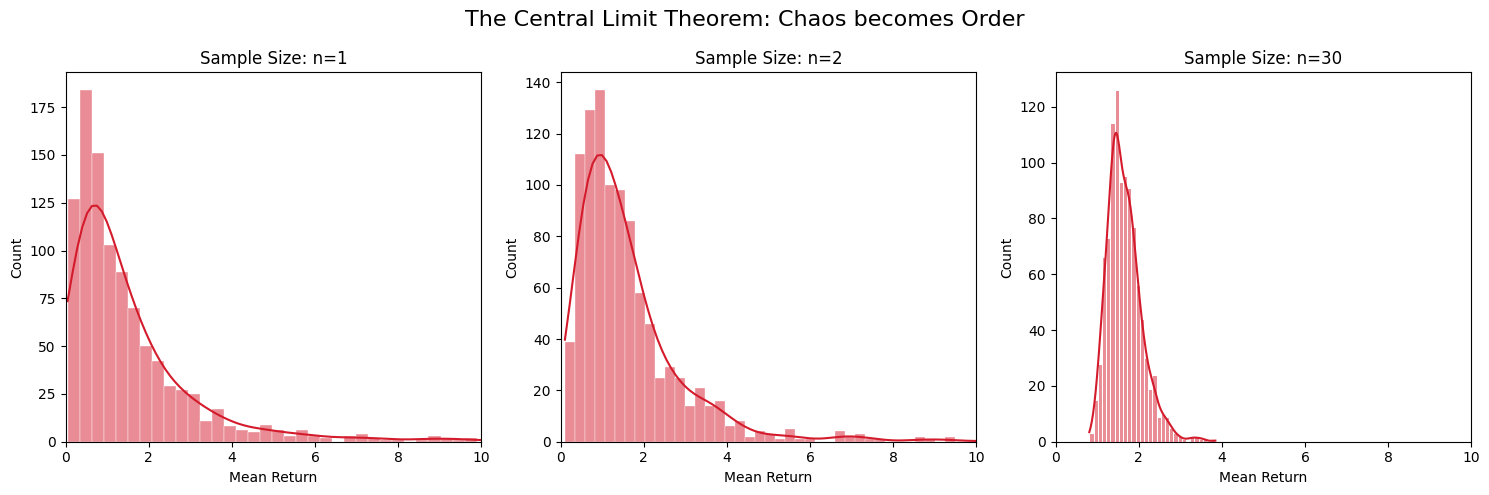

In [4]:
# Setup: Compare 3 sample sizes to match the slide
sample_sizes = [1, 2, 30]
simulations = 1000

plt.figure(figsize=(15, 5))

for i, n in enumerate(sample_sizes):
    # 1. The Loop: Calculate 1000 averages
    means = []
    for _ in range(simulations):
        sample = np.random.choice(population_data, size=n)
        means.append(np.mean(sample))

    # 2. Plotting
    plt.subplot(1, 3, i+1)
    sns.histplot(means, kde=True, color='#d41b2c', edgecolor='white')
    plt.title(f"Sample Size: n={n}")
    plt.xlabel("Mean Return")
    plt.xlim(0, 10)

plt.suptitle("The Central Limit Theorem: Chaos becomes Order", fontsize=16)
plt.tight_layout()
plt.show()

##  Module C: The Series C SaaS Metric (LTV/CAC)

##### Objective: Calculating Confidence Intervals for Venture Capital benchmarks

## Part 1: The Soup Analogy (Does Population Size Matter?)


In [5]:
# 1. Setup: Two Populations, same variance, vastly different sizes
std_dev = 15000  # Variation in spending
n = 100          # We only sample 100 users (The "Teaspoon")

# 2. Calculate Margin of Error (1.96 * sigma / sqrt(n))
# Notice: Big 'N' (Population Size) is NOT in this formula!
margin_error = 1.96 * std_dev / np.sqrt(n)

print(f"--- The Soup Analogy ---")
print(f"Population: 1,000 users   | Margin of Error: ± ${margin_error:,.2f}")
print(f"Population: 1,000,000 users | Margin of Error: ± ${margin_error:,.2f}")
print(f"Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.")

--- The Soup Analogy ---
Population: 1,000 users   | Margin of Error: ±$2,940.00
Population: 1,000,000 users | Margin of Error: ±$2,940.00
Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.


### Part 2: The VC Audit (Robust vs. Volatile)

In [6]:
# Metric: LTV/CAC Ratio (Target > 3.0)
mean_val = 4.0
n_samples = 50

# Compare Stable (A) vs Volatile (B) Companies
sigma_A = 0.5  # Stable
sigma_B = 6.0  # Volatile

moe_A = 1.96 * sigma_A / np.sqrt(n_samples)
moe_B = 1.96 * sigma_B / np.sqrt(n_samples)

print("\n--- VC Audit: Series C Benchmark (> 3.0) ---")

print(f"Startup A (Stable):")
print(f"   95% CI: [{mean_val - moe_A:.1f}, {mean_val + moe_A:.1f}]")
print(f"   Decision: INVEST. (Lower bound > 3.0)")

print(f"\nStartup B (Volatile):")
print(f"   95% CI: [{mean_val - moe_B:.1f}, {mean_val + moe_B:.1f}]")
print(f"   Decision: PASS. (Lower bound implies potential loss)")


--- VC Audit: Series C Benchmark (> 3.0) ---
Startup A (Stable):
   95% CI: [3.9, 4.1]
   Decision: INVEST. (Lower bound > 3.0)

Startup B (Volatile):
   95% CI: [2.3, 5.7]
   Decision: PASS. (Lower bound implies potential loss)


## Phase 4: GenAI Expansion — The "P.R.I.M.E." Protocol

##### Objective: We will simulate a startup's runway. First, we build a "Naive" model manually (assuming Revenue and Costs are unrelated). Then, you will use AI to introduce Correlation (The "Real World")

### Step 1: The "Naive" Simulation (Manual Code)


In [7]:
import numpy as np

# BASE CASE: Independence Assumption (The "Naive" Model)
n_simulations = 1000
months = 24
start_cash = 2_000_000
bankruptcies = 0

print("\n--- Running Base Model (Independence) ---")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # SIMULATION LOGIC:
        # Revenue: Average $80k, swings wildly (StdDev $30k)
        # Burn: Average $100k, fairly fixed (StdDev $10k)
        # INDEPENDENT: Bad revenue months don't automatically trigger cost cuts.

        revenue = np.random.normal(80000, 30000)
        burn = np.random.normal(100000, 10000)

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin = bankruptcies / n_simulations
print(f"Base Model Risk of Ruin: {prob_ruin:.1%}")
print("Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.")


--- Running Base Model (Independence) ---
Base Model Risk of Ruin: 0.0%
Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.


### Step 2: The "Co-Pilot" Expansion (GenAI)


In [8]:
#  CORRELATED MODEL: Revenue and Burn are linked (rho = 0.7)
n_simulations = 1000
months = 24
start_cash = 2_000_000
bankruptcies_corr = 0

# Means and standard deviations
mean_revenue = 80000
mean_burn = 100000
std_revenue = 30000
std_burn = 10000
rho = 0.7  # Correlation coefficient

# Covariance matrix
cov_matrix = [
    [std_revenue**2, rho * std_revenue * std_burn],
    [rho * std_revenue * std_burn, std_burn**2]
]

print("\n--- Running Correlated Model (rho=0.7) ---")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # Generate correlated revenue and burn
        revenue, burn = np.random.multivariate_normal(
            [mean_revenue, mean_burn],
            cov_matrix
        )

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies_corr += 1

prob_ruin_corr = bankruptcies_corr / n_simulations
print(f"Correlated Model Risk of Ruin: {prob_ruin_corr:.1%}")
print(f"\nComparison:")
print(f"  Independent Model: {prob_ruin:.1%}")
print(f"  Correlated Model:  {prob_ruin_corr:.1%}")
print(f"\nWhy? When revenue drops, burn also drops (management cuts costs).")
print(f"This correlation acts as a 'natural hedge' that reduces bankruptcy risk.")


--- Running Correlated Model (rho=0.7) ---
Correlated Model Risk of Ruin: 0.0%

Comparison:
  Independent Model: 0.0%
  Correlated Model:  0.0%

Why? When revenue drops, burn also drops (management cuts costs).
This correlation acts as a 'natural hedge' that reduces bankruptcy risk.
